<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [99]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [100]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [101]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

df = pd.read_csv('titanic.csv')
des = df.describe()
des.loc['NaN'] = df.isna().sum()
des.loc['%NaN'] = (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
NaN,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%NaN,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [102]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch

df1 = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [104]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df2 = df1.dropna(subset=['Age'])
desc_na= df2.isna().sum()
desc_na

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [105]:
df2 = df2.reset_index(drop=True)
df2.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch
709,0,3,female,39.0,0,5
710,0,2,male,27.0,0,0
711,1,1,female,19.0,0,0
712,1,1,male,26.0,0,0
713,0,3,male,32.0,0,0


In [106]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar
df2.shape[0]

714

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [107]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


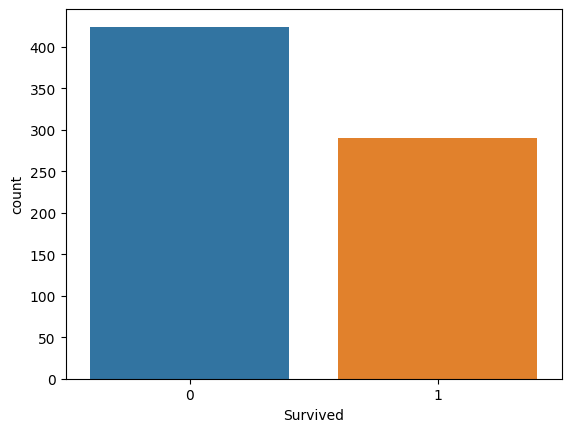

0    424
1    290
Name: Survived, dtype: int64

In [108]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
sns.countplot(data=df2, x='Survived')
plt.show()
df2['Survived'].value_counts()

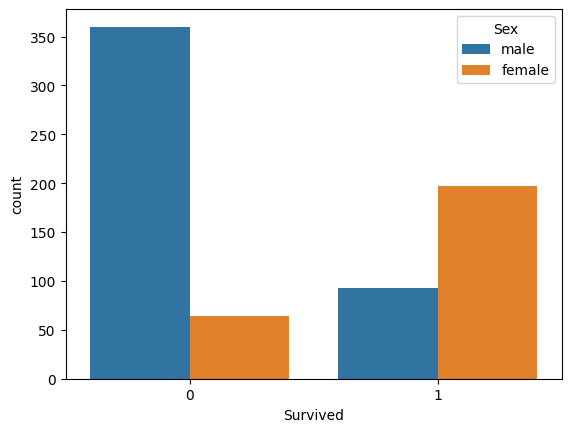

Pclass  Age  SibSp  Parch
Survived Sex                              
0        female      64   64     64     64
         male       360  360    360    360
1        female     197  197    197    197
         male        93   93     93     93

In [109]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(data=df2, x='Survived', hue='Sex')
plt.show()

df2.groupby(['Survived','Sex']).count()

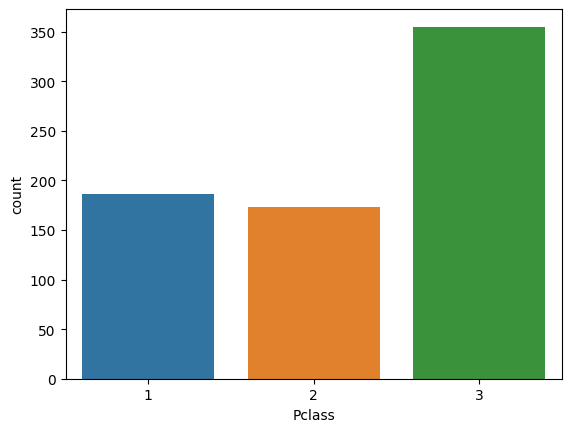

3    355
1    186
2    173
Name: Pclass, dtype: int64

In [110]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
sns.countplot(data=df2, x='Pclass')
plt.show()
df2['Pclass'].value_counts()

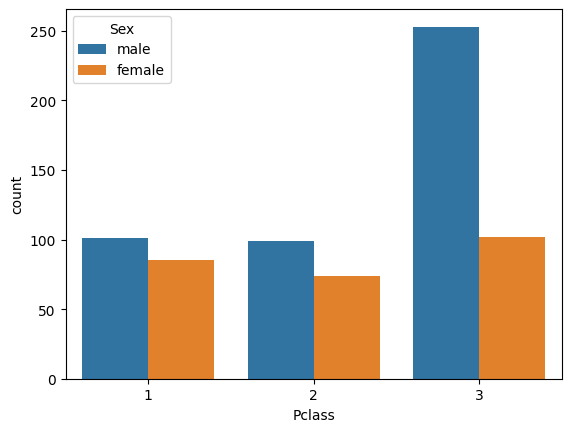

Survived  Age  SibSp  Parch
Pclass Sex                                
1      female        85   85     85     85
       male         101  101    101    101
2      female        74   74     74     74
       male          99   99     99     99
3      female       102  102    102    102
       male         253  253    253    253

In [111]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(data=df2, x='Pclass', hue='Sex')
plt.show()

df2.groupby(['Pclass','Sex']).count()

#### Transformar variables categóricas texto a clases numeradas

In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df2.copy()

In [114]:
df_cod.shape

(714, 6)

In [115]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()

label_encoding = le.fit_transform(df_cod['Sex'])
label_encoding_df = pd.DataFrame(label_encoding, columns=['type'],dtype=int)
label_encoding_df = label_encoding_df.add_prefix('Sex'+'_')
# label_encoding_df.isna().sum()
# label_encoding.shape
print(df_cod.shape)
df_cod1 = df_cod.join(label_encoding_df, on=df_cod.index)
print(df_cod1.shape)
df_cod1 = df_cod1.drop(['Sex'], axis=1)
# df_cod.head()

(714, 6)
(714, 7)


In [116]:
df_cod1.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Sex_type    0
dtype: int64

In [140]:
df_cod1.shape

(714, 6)

In [119]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
le.classes_

array(['female', 'male'], dtype=object)

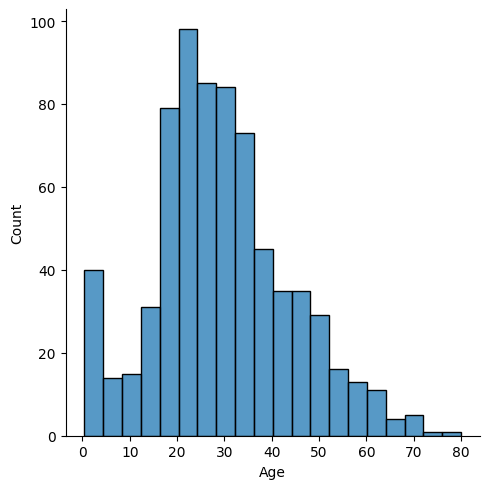

In [142]:
# Alumno: Analizar la distribución de la edad
sns.displot(data=df_cod1, x='Age')
plt.show()

In [143]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando

df_cod2 = df_cod1.copy()

In [144]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cod2.loc[:,'Age'] = scaler.fit_transform(df_cod2[['Age']])
df_cod2.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_type
0,0,3,0.271174,1,0,1
1,1,1,0.472229,1,0,0
2,1,3,0.321438,0,0,0
3,1,1,0.434531,1,0,0
4,0,3,0.434531,0,0,1


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [145]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X = df_cod2.drop('Survived', axis=1).values
y = df_cod2['Survived'].values

In [146]:
X.shape

(714, 5)

In [147]:
y.shape

(714,)

In [148]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape
in_shape= X.shape[1]

In [149]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea
out_shape = 1

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [150]:
# Alumno, generar los dataset de train y test superando en 80%20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
X_train.shape

(571, 5)

In [152]:
y_train.shape

(571,)

In [153]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta

model = Sequential()
model.add(Dense(units=128, activation='sigmoid', input_shape=(in_shape,)))
model.add(Dense(units=out_shape, activation='sigmoid'))

In [154]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [155]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=100, batch_size=32)

Epoch 1/100
15/15 [==============================] - 1s 16ms/step - loss: 0.7614 - accuracy: 0.5614 - val_loss: 0.7293 - val_accuracy: 0.5478
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6358 - accuracy: 0.7171 - val_loss: 0.6251 - val_accuracy: 0.7391
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5940 - accuracy: 0.6930 - val_loss: 0.6128 - val_accuracy: 0.6870
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5652 - accuracy: 0.7083 - val_loss: 0.5814 - val_accuracy: 0.7217
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5562 - accuracy: 0.7829 - val_loss: 0.5678 - val_accuracy: 0.7391
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5221 - accuracy: 0.7982 - val_loss: 0.5517 - val_accuracy: 0.7478
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5032 - accuracy: 0.8070 - val_loss: 0.5301 - val_accuracy: 0.7652
Epoch 8/100


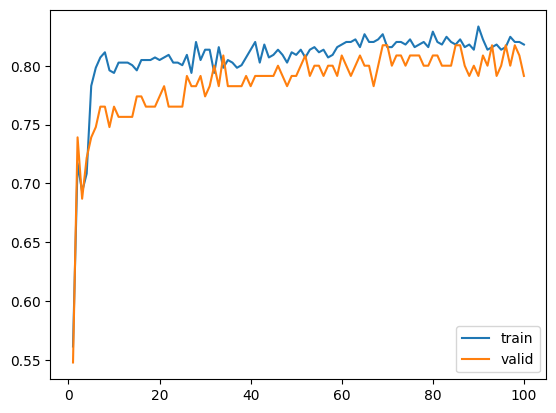

In [156]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line

epocas_conteo= range(1, len(history.history['accuracy']) + 1)

sns.lineplot(x=epocas_conteo,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epocas_conteo,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [157]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test
y_hat_prob = model.predict(X_test)


5/5 [==============================] - 0s 2ms/step


In [158]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat

y_hat = [1 if x >= 0.5 else 0 for x in y_hat_prob]

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [159]:
# Alumno, calcular la exactitud (accuracy) de su modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.7412587412587412

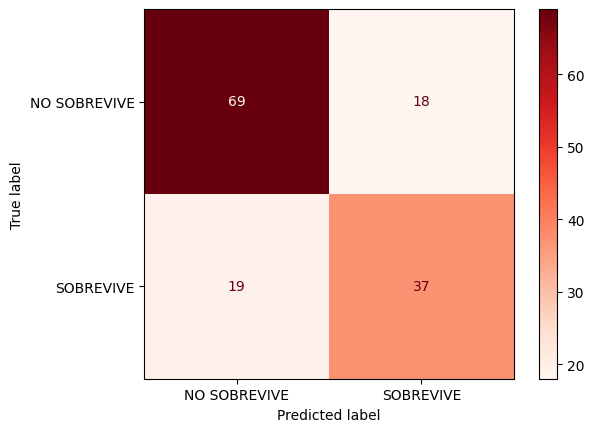

In [160]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=['NO SOBREVIVE', 'SOBREVIVE'])
cmd.plot(cmap=plt.cm.Reds)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [164]:
columns_name = df2.columns
columns_name

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [182]:
from pandas.core.strings.accessor import Scalar
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo

test = pd.DataFrame({columns_name[1]:[2], columns_name[2]:['female'], columns_name[3]:[25], columns_name[4]:[1], columns_name[5]:[0]})
test_sex = le.transform(test['Sex'])
test_sex_df = pd.DataFrame(test_sex)
test_sex_df = test_sex_df.add_prefix('Sex'+'_')
test = test.join(test_sex_df)
test = test.drop('Sex', axis=1)
test.loc[:,'Age'] = scaler.transform(test[['Age']])
test

,Pclass,Age,SibSp,Parch,Sex_0
0,2,0.308872,1,0,0


In [184]:
y_hat_test_prob = model.predict(test)
y_hat_test_prob

1/1 [==============================] - 0s 75ms/step


array([[0.87849027]], dtype=float32)

In [189]:
y_hat_test = [1 if x >= 0.5 else 0 for x in y_hat_test_prob]
y_hat_test

[1]